In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Main information about the Titanic dataset 

In [2]:
def titanic_info():
    df = pd.read_csv("titanic.csv", index_col=0)
    print("Information about the Titanic dataset: ")
    df.info()
    titanic_fare(df)

In [3]:
def titanic_fare(df):
    fare_head = df['Fare'].head()
    print(fare_head)
    
    # Plotting histogram of fare
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.hist(df["Fare"], bins=20, color="purple", edgecolor="blue")
    plt.xlabel("Fare")
    plt.ylabel("Count of Tickets")
    plt.title("Ticket Fares for the Titanic Trip")

    # Plotting boxplot of fare
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y='Fare')
    plt.ylabel("Fare")
    plt.title("Boxplot of Ticket Fares")

    plt.tight_layout()
    plt.show()
    
    # Calculating and displaying information about outliers
    q1 = df['Fare'].quantile(0.25)
    q3 = df['Fare'].quantile(0.75)
    iqr = q3 - q1
    upper_fence = q3 + (1.5 * iqr)
    lower_fence = q1 - (1.5 * iqr)
    
    print("\nOutlier Information:")
    print("Interquartile range (IQR):", iqr)
    print("Upper Fence:", upper_fence)
    print("Lower Fence:", lower_fence)
    
    outliers_upper = df[df["Fare"] > upper_fence]
    outliers_lower = df[df["Fare"] < lower_fence]
    
    print("\nNumber of Upper Fence Outliers:", len(outliers_upper))
    print("Number of Lower Fence Outliers:", len(outliers_lower))

Information about the Titanic dataset: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
PassengerId
1     7.2500
2    71.2833
3     7.9250
4    53.1000
5     8.0500
Name: Fare, dtype: float64


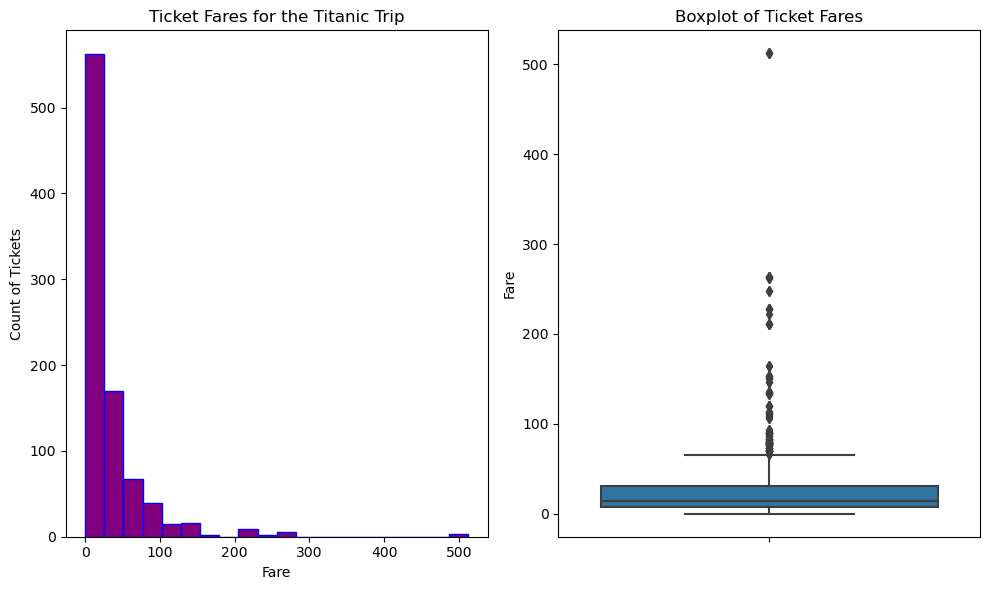


Outlier Information:
Interquartile range (IQR): 23.0896
Upper Fence: 65.6344
Lower Fence: -26.724

Number of Upper Fence Outliers: 116
Number of Lower Fence Outliers: 0


In [4]:
titanic_info()

### Analysing the gender distribution of passengers and their survival rates

In [5]:
def gender_survival():
    df = pd.read_csv("titanic.csv", index_col=0)
    
    # Creating a cross-tabulation table
    table = pd.crosstab(df['Survived'], df['Sex'])
    print("Survival Count by Gender:")
    print(table)
    
    print("\nImportant Info: 0 = No (Did Not Survive); 1 = Yes (Survived)")
    
    # Calculating and displaying mean survival by gender
    mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
    print("\nMean Survival by Gender:")
    print(mean_survival_by_gender)
    
    # Plotting bar chart for mean survival by gender
    plt.figure(figsize=(8, 6))
    mean_survival_by_gender.plot(kind='bar', color='pink', edgecolor='blue')
    plt.xlabel("Gender")
    plt.ylabel("% of Survival")
    plt.title("Survival Percentage Based on Gender for Titanic")
    plt.xticks(rotation=0)
    plt.show()
    
    # Groupping data by gender for survivors and non-survivors
    survivors_data = df[df.Survived == 1]
    non_survivors_data = df[df.Survived == 0]

    gender_categories = ['female', 'male']
    survivors_gender = survivors_data['Sex'].value_counts().loc[gender_categories].values
    non_survivors_gender = non_survivors_data['Sex'].value_counts().loc[gender_categories].values
    
    # Plotting count of survivors by gender
    plt.figure(figsize=(8, 4))
    plt.bar(gender_categories, survivors_gender, label='Survivors', color='blue')
    plt.bar(gender_categories, non_survivors_gender, bottom=survivors_gender, label='Non-Survivors', color='green')
    plt.ylabel("Count")
    plt.xlabel("Gender")
    plt.title("Count of Survivors by Gender")
    plt.legend(loc='upper left')
    plt.show()

Survival Count by Gender:
Sex       female  male
Survived              
0             81   468
1            233   109

Important Info: 0 = No (Did Not Survive); 1 = Yes (Survived)

Mean Survival by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


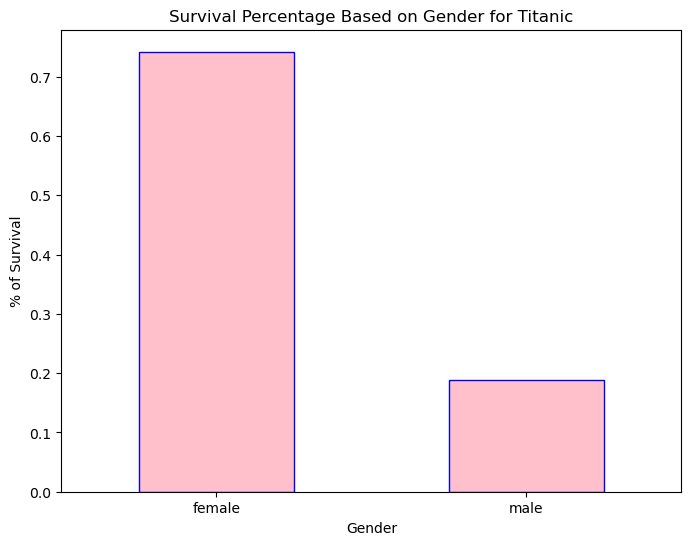

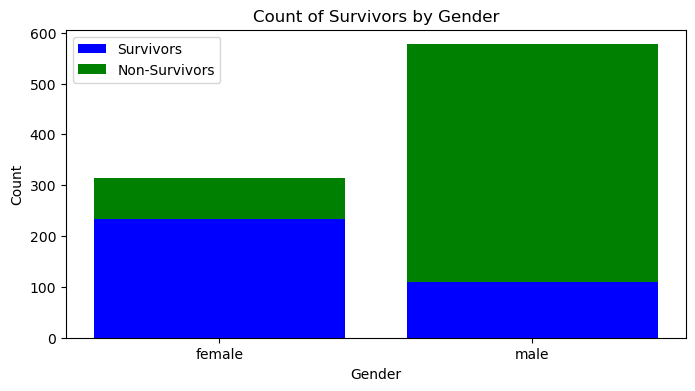

In [6]:
gender_survival()

### Analysing the age distribution of passengers and comparing it with survival rates

In [7]:
def age_distribution_and_survival():
    df = pd.read_csv("titanic.csv", index_col=0)
    
    # Plotting age distribution for all passengers regardless of their survival state
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Age', bins=20, kde=True, color='purple')
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.title("Age Distribution of Passengers")
    plt.show()
    
    # Plotting age distribution for survivors and non-survivors
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True, palette={0: 'blue', 1: 'red'})
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.title("Age Distribution by Survival")
    plt.legend(labels=["Did Not Survive", "Survived"])
    plt.show()

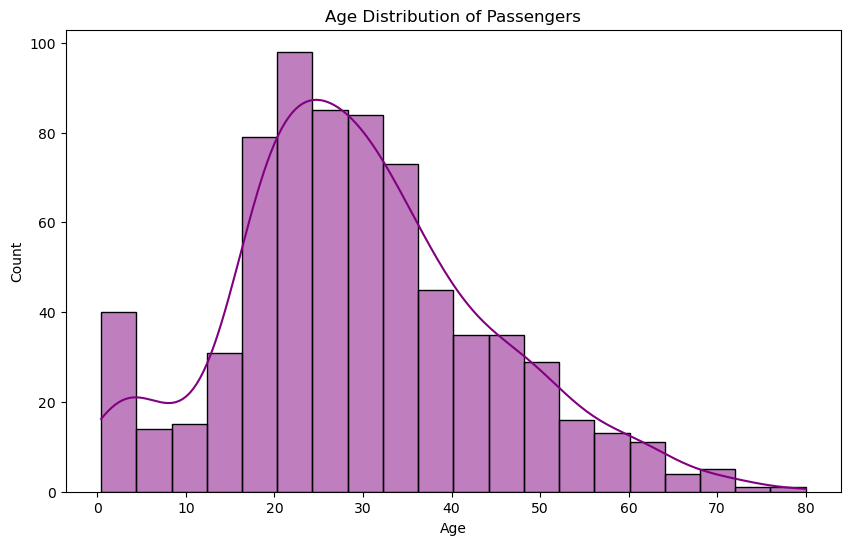

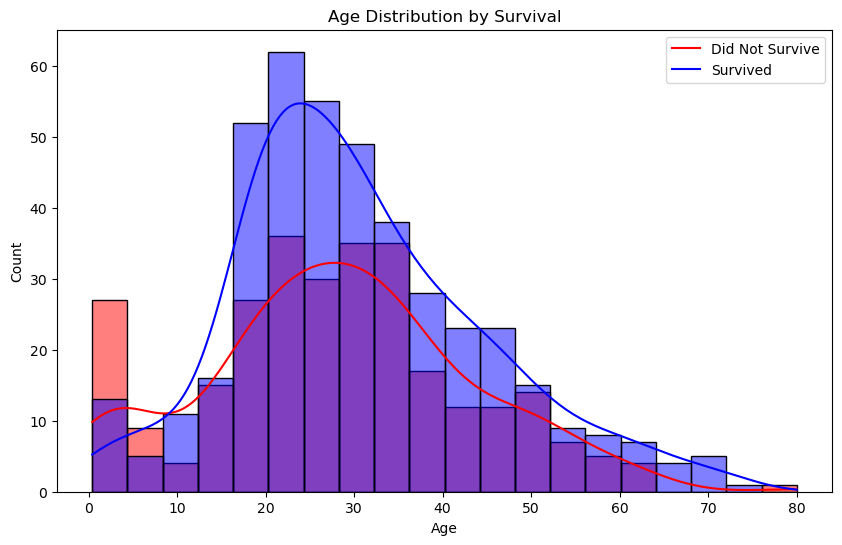

In [8]:
age_distribution_and_survival()

### Exploring the relationship between passenger class and survival

In [9]:
def pclass_and_survival():
    df = pd.read_csv("titanic.csv", index_col=0)
    
    # Creating a cross-tabulation table of Pclass and Survival
    pclass_survival_table = pd.crosstab(df['Pclass'], df['Survived'], margins=True, margins_name="Total")
    print("Cross-tabulation of Pclass and Survival:")
    print(pclass_survival_table)
    
    # Plotting survival rates by passenger class
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df, x='Pclass', y='Survived', ci=None, palette='Set2')
    plt.xlabel("Passenger Class")
    plt.ylabel("Survival Rate")
    plt.title("Survival Rate by Passenger Class")
    plt.xticks(ticks=[0, 1, 2], labels=["1st Class", "2nd Class", "3rd Class"])
    plt.show()

Cross-tabulation of Pclass and Survival:
Survived    0    1  Total
Pclass                   
1          80  136    216
2          97   87    184
3         372  119    491
Total     549  342    891


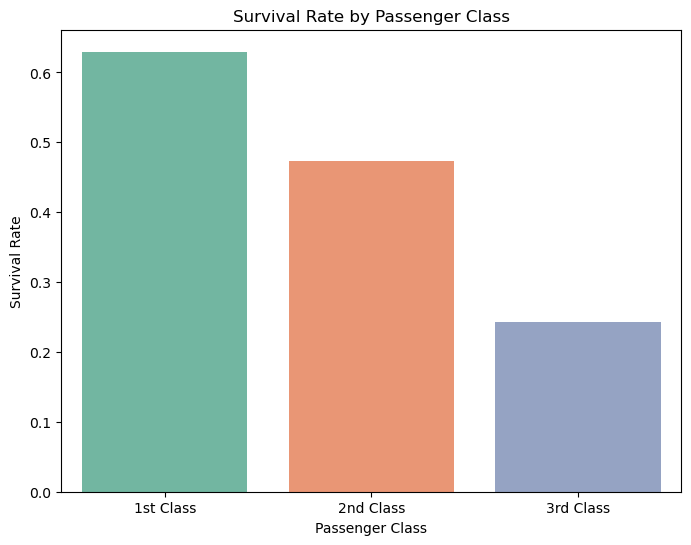

In [10]:
pclass_and_survival()

### Investigating whether the port of embarkation had any impact on survival

In [11]:
def embarked_and_survival():
    df = pd.read_csv("titanic.csv", index_col=0)
    
    # Cross table of Embarked and Survival
    embarked_survival_table = pd.crosstab(df['Embarked'], df['Survived'], margins=True, margins_name="Total")
    print("Cross-tabulation of Embarked and Survival:")
    print(embarked_survival_table)
    
    # Plotting survival rates by embarkation port
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df, x='Embarked', y='Survived', ci=None, palette='Set1')
    plt.xlabel("Embarked Port")
    plt.ylabel("Survival Rate")
    plt.title("Survival Rate by Embarked Port")
    plt.xticks(ticks=[0, 1, 2], labels=["Cherbourg", "Queenstown", "Southampton"])
    plt.show()

Cross-tabulation of Embarked and Survival:
Survived    0    1  Total
Embarked                 
C          75   93    168
Q          47   30     77
S         427  217    644
Total     549  340    889


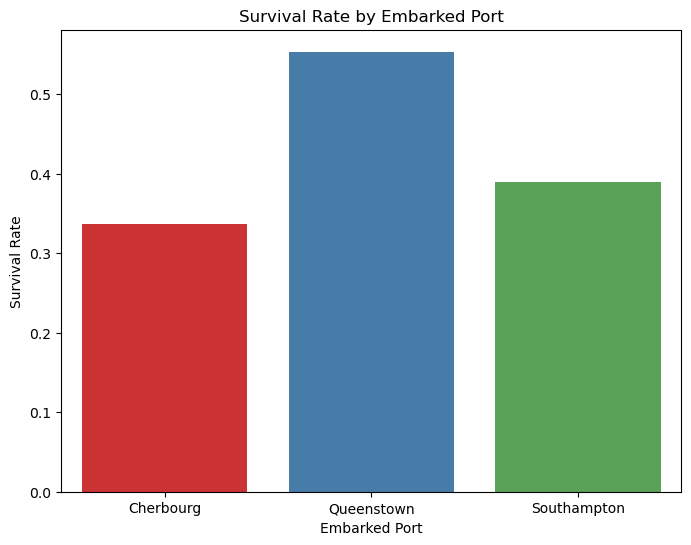

In [12]:
embarked_and_survival()

In [13]:
def embarked_heatmap():
    df = pd.read_csv("titanic.csv", index_col=0)
    
    # Creating a cross-tabulation table of Embarked and Survival
    embarked_survival_table = pd.crosstab(df['Embarked'], df['Survived'])
    
    # Calculating survival rates for each port
    survival_rates = embarked_survival_table.div(embarked_survival_table.sum(axis=1), axis=0)
    
    # Creating a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(survival_rates, annot=True, cmap="YlGnBu", fmt=".2%", cbar=False)
    plt.xlabel("Survived")
    plt.ylabel("Embarked Port")
    plt.title("Survival Rate by Embarked Port")
    plt.xticks(ticks=[0.5, 1.5], labels=["Did Not Survive", "Survived"])
    plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Cherbourg", "Queenstown", "Southampton"])
    plt.show()

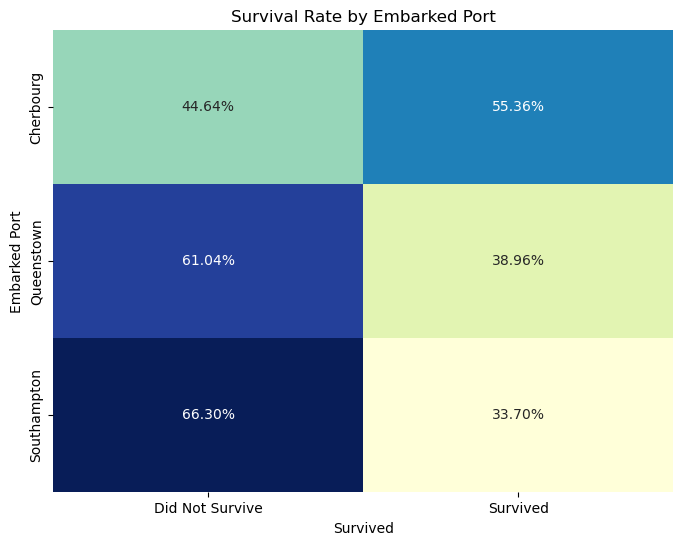

In [14]:
embarked_heatmap()